### Gradient Boosting Machines OOB v.s  Decision Tree Demo 99.30% Acc - Sklearn


by John Ryan

<div class="alert alert-block alert-info" style="margin-top: 20px">**Note:** Citation:  Data Source: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. UCI Machine learning Repository http://archive.ics.uci.edu/ml/datasets.html.</div>


For the purpose of this analysis we will look to machine learning as a method to predict diagnosis of cancers.

**Question:** How do we predict the cancer status of a patient given their health measurements?


#### Decision Trees & Gradient Boosting Machines - Ensemble Methods

Decision Trees are a machine learning method that classifies data heuristically.  The method divides data into increasingly smaller portions to identify patterns for prediction. It can be applied to a complex dataset and produce a series of specific choices that produce logical decisions. A decision tree can be viewed as flowchart where the data is constantly divided according to a new criterion to provide further tree nodes/choices. Decision trees can be problematic if they become ‘too’ big as accuracy is lost as more stringent rules are applied to the date. The use of bagging or boosting aims to minimize this issue by finding the optimal tree size that can be applied to the test data.


#### Import Required Libaries

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore", category=DeprecationWarning,
                       module="pandas, lineno=570")
from __future__ import print_function
import requests
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import log_loss, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from matplotlib import pyplot

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Load the data

In [2]:
#Load the data
# Make dataset a Pandas DataFrame
df = pd.read_csv("C:\\data\\wisc_bc_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### One Hot Encoder

In [3]:
#transform attributes to algortim readable numeric representations of the original data.
for feature in df.columns:
    if df[feature].dtype=='object':
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
df.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
y = df.diagnosis.values
X = df.drop('diagnosis', axis=1)

In [5]:
#split the data into training and test data sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Gradient Boosting Machine (GBM)

In [6]:
#Build a GBM classification model, create a variable to define the desired parameters to 
#opitmize performance and reduce over fitting
from sklearn import ensemble
params = {'n_estimators': 1200, 'max_depth': 5, 'subsample': 0.5,
         'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3 }
gbm1 = ensemble.GradientBoostingClassifier(**params)

In [7]:
gbm1.fit(X_train, y_train)
acc = gbm1.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.9720


In [8]:
#Make class predictions for the test set
y_predict_class_gbm = gbm1.predict(X_test)
#Make  prediction probabailties for the test set
y_predict_proba_gbm = gbm1.predict_proba(X_test)[:,1]

### Improving performance: Gradient Boosting Machine - Decreased Learning Rate

Having summarized and examined the model, it was then applied to the test dataset further where a predicted score & confusion table was generated to compare performance against predicted values.

Boosting is implemented to combine weak performer learners, creating a model which should improve accuracy. The parameters are specified (n_estimators': 1200, 'max_depth': 5, 'subsample': 0.5,'learning_rate': 0.01,'min_samples_leaf': 1,'random_state': 3) in such away to improve performance and reduce overfitting thus producing an out of the bag model, where the results were noted as having improved on the initial model.

##### Learning Rate: 

Gradient boosting Machines esembles in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.
The number of weak learners (i.e. decision trees) is controlled by the number of estimators; The size of each tree can be controlled either by max_depth or the learning_rate is a hyper-parameter in the range (0.0, 1.0) that controls overfitting via shrinkage which gradually reduces the impact of predictions of each subsequent tree generated. however increased shrinkage lead to longer run times. In the model created below we set the learning rate to 0.05 which is shown to improve the model performance.

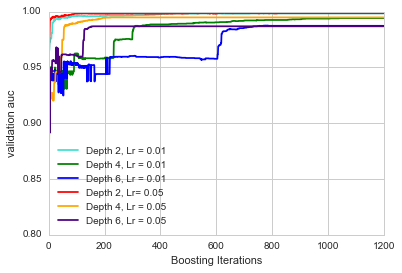

In [9]:
from sklearn.ensemble import GradientBoostingClassifier as gbm
params_dict = {'n_estimators': 1200, 'random_state': 3}
plt.figure()
for label, color, setting in [('Depth 2, Lr = 0.01', 'turquoise', {'learning_rate': 0.01, 'max_depth': 2}),
                              ('Depth 4, Lr = 0.01', 'green', {'learning_rate': 0.01, 'max_depth': 4}),
                              ('Depth 6, Lr = 0.01', 'blue', {'learning_rate':0.01, 'max_depth': 6 }),
                              ('Depth 2, Lr= 0.05', 'red', {'learning_rate': 0.05, 'max_depth': 2}),
                              ('Depth 4, Lr = 0.05', 'orange', {'learning_rate': 0.05, 'max_depth': 4}),
                              ('Depth 6, Lr = 0.05', 'indigo', {'learning_rate':0.05, 'max_depth': 6 })]:
    params_1 = dict(params_dict)
    params_1.update(setting)
    gbm_lr = gbm(**params_1)
    gbm_lr.fit(X_train, y_train)
    #calcualte the area under the curce (auc) for the test set
    test_deviance = np.zeros((params_1['n_estimators'],), dtype=np.float64)
    for g, y_pred in enumerate(gbm_lr.staged_predict_proba(X_test)):
        test_deviance[g] =roc_auc_score(y_test, y_pred[:,1])
    plt.plot((np.arange(test_deviance.shape[0]) + 1), test_deviance, '-', color=color, label=label)

plt.legend(loc='lower left')
pyplot.ylim(0.8, 1.0)
plt.xlabel('Boosting Iterations')
pyplot.ylabel("validation auc")
plt.figure(figsize=(12,12))
plt.show()

### Visual examination of improved performance by tuning the hyper-paramters learning rate

The AUC plot below demonstrates the improved performance and algorithm control of the learning rate over time on the test data. We see as the tree depth increases from 2(turquoise line), 4(green line) & 6(blue line) with learning rate set 0.01 as the tree grows towards the max depth of 6 the learning on the data starts to stagnate as evident from the blue line above.

On review of the altering the learning rate to 0.05 we see better control and reduced shrinkage as eveident from the red, orange and indigo lines on the graph. Initially learning is slow but we see that improvement over time as the each line begins to gradually incline and straighten. 

#### Gradient Boosting Machine - alter model learning Rate to 0.5

In [10]:
params1 = {'n_estimators': 1200, 'max_depth': 5, 'subsample': 0.5,
         'learning_rate': 0.05, 'min_samples_leaf': 1, 'random_state': 3 }
gbm2 = ensemble.GradientBoostingClassifier(**params1)

In [11]:
gbm2.fit(X_train, y_train)
acc = gbm2.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.9790


In [12]:
#Make class predictions for the test set
y_predict_class_gbm2 = gbm2.predict(X_test)
#Make  prediction probabailties for the test set
y_predict_proba_gbm2 = gbm2.predict_proba(X_test)[:,1]

### Decision Tree Classifier - Max Depth 4

In [13]:
#Create decision tree classifier with max depth 4 and print out the accuracy.
from sklearn import tree
params2 = {'max_depth': 4 , 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.5} 
tree1 = tree.DecisionTreeClassifier(**params2)
tree1 = tree1.fit(X_test, y_test)
acc2 = tree1.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc2))

Accuracy: 0.9930


In [14]:
#Make class predictions for the test set
y_predict_class_tree1 = tree1.predict(X_test)
#Make  prediction probabailties for the test set
y_predict_proba_tree1 = tree1.predict_proba(X_test)[:,1]

#### Area Under AUC Curve

The ROC curve helps to select a threshold value that balances sensitivity and specificity in a way that makes sense.

AUC is a popular metric. I believe it is a good metric given the unbalaced classes seen above. It is used to judge predictions in binary response (0/1) problem. It is only sensitive to the order determined by the predictions and not their magnitudes.

For other evaluation methods, a user has to choose a cut-off point above which the target variable is part of the positive class (e.g. a logistic regression model returns any real number between 0 and 1 - the modeler might decide that predictions greater than 0.5 mean a positive class prediction while a prediction of less than 0.5 mean a negative class prediction). AUC evaluates entries at all cut-off points, giving better insight into how well the classifier is able to separate the two classes.


#### ROC Curve for Cancer Prediction - Gradient Boosting Machine - learning rate 0.01

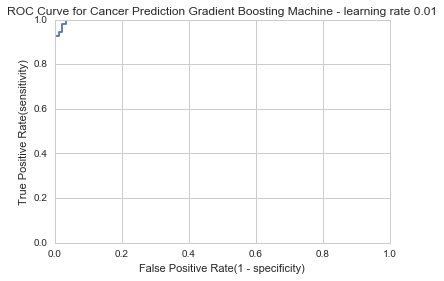

In [15]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_proba_gbm)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for Cancer Prediction Gradient Boosting Machine - learning rate 0.01')
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.grid(True)

#### ROC Curve for Cancer Prediction - Gradient Boosting Machine - learning rate 0.05

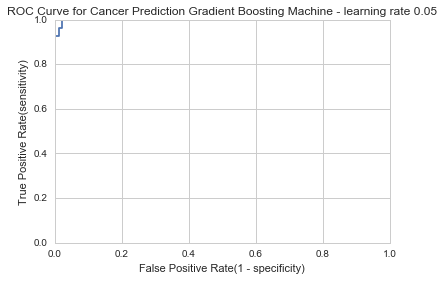

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_proba_gbm2)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for Cancer Prediction Gradient Boosting Machine - learning rate 0.05')
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.grid(True)

#### ROC Curve for Cancer Prediction - Decison Tree - Max Depth 4

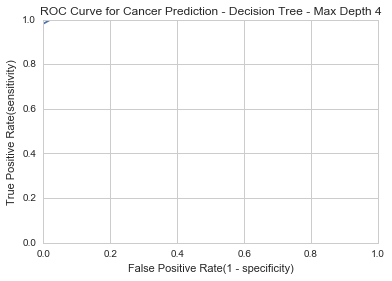

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_proba_tree1)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for Cancer Prediction - Decision Tree - Max Depth 4')
plt.xlabel('False Positive Rate(1 - specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.grid(True)